<a href="https://colab.research.google.com/github/zcvpal2/Aiffel-follow-deep-learning/blob/main/%EC%97%B0%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow as keras

import numpy as np 
import matplotlib.pyplot as plt
import os 

print(tf.__version__)

2.8.0


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(len(x_train))

11501568/11490434 [==============================] - 0s 0us/step
60000


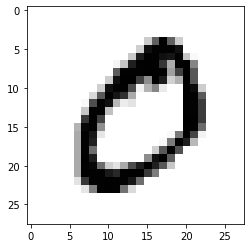

In [6]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [7]:
print(y_train[1])

0


### 이미지에 대응하는 실제 숫자 값이 담겨 있다

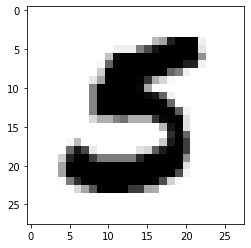

1994 번째 이미지의 숫자는 바로 5 입니다


In [9]:
index = 1993
plt.imshow(x_train[index], cmap = plt.cm.binary)
plt.show()
print((index+1), '번째 이미지의 숫자는 바로', y_train[index], '입니다')

### 학습용 데이터의 수 파악

In [10]:
print(x_train.shape, "(몇장,크기,크기)")
print(x_test.shape, "(몇장,크기,크기)")

(60000, 28, 28) (몇장,크기,크기)
(10000, 28, 28) (몇장,크기,크기)




*   train_set = 학습을 위한 데이터, 각기 다른 모델(hidden layer, hyper parameter)을 서로 다른 epoch로 학습    
*   validation_set = 학습이 완료된 모델을 검증하기 위한 데이터 set   
* test_set = 학습과 검증이 완료된 모델의 성능을 평가하기 위한 dataset 
* 6대 2대 2로 나뉜다

* validation_set, test_set의 공통점은 데이터를 통해 모델을 학습시키지 않는다는 것이고 차이점은 validation은 학습에 관여는 한다는 점, test는 성능 평가에 사용된다는 점이다



*   validation을 사용하는 이유: 적절한 epoch를 찾아 overfitting이 발생하지 않게 학습 시켜야 하고, 동시에 learning rate와 hidden layer를 조정해가며 오버피팅에 빠지지 않고, unseen data에 대해서도 좋은 성능을 가질 수 있도록 해야



In [12]:
print("최소값:", np.min(x_train), '최대값: ', np.max(x_train)) ### 픽셀 값의 최소와 최대

최소값: 0 최대값:  255




* 위와 같은 방법으로 데이터의 픽셀 값이 최대가 몇이고 최소가 몇인지 확인한 뒤에, 데이터를 최대값으로 나눠줘, 최소값이 0 최대값이 1이 되게 만들어 준다


*   테스트 데이터에도 똑같이 적용해줘야 한다.






In [13]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


# Sequential Model 사용

tf.keras의 Sequential API를 이용하여 LeNet 네트워크를 설계

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7




*   Conv2D의 첫번째 인자는 사용하는 이미지 특징의 수로, 처음은 16개의 이미지 특징을 뒤의 32개는 32개의 이미지 특징을 고려한다는 것을 말하는데, 훨씬 디테일하고 복잡한 이미지의 경우 이 숫자를 늘리는 것을 고려해 볼 만 하다.
*   Dense 레이어의 경우 분류기를 의미하며 값이 클수록 복잡한 분류기를 만들어, 클래스가 많을 수록 이 수를 늘리는 것이 좋고, 마지막 Dense 레이어 에서만 결과를 위한 클래스 수를 지정하면 된다. 숫자면 10개(0,1,2,3,4,5,6,7,8,9 으로 이루어져 있으니까) 이렇게 말이다



In [17]:
model.summary() # 만든 딥러닝 네트워크 모델 확인

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)               